In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import os
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
import sys
import joblib

In [2]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# ALEXANDRA'S PATH TO DATA:
path_to_folder = ('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/')

In [6]:
fn = 'ELA_training_data.csv'  # file name
df = pd.read_csv(os.path.join(path_to_folder, fn))

In [8]:
training_columns = ['Area', 'Zmed', 'Slope', 'Aspect']
training_columns_display = ['Area', 'Z$_{med}$', 'Slope', 'Aspect']
label = ['AAR']

In [10]:
# Classifier names
model_names = [
  "Linear Regression",
    "Random Forest Regression",
    "Decision Tree Regression",
    "Support Vector Regression",
    "Gradient Boosting Regression",
    "Ridge Regression"

]

# models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    Ridge()
]

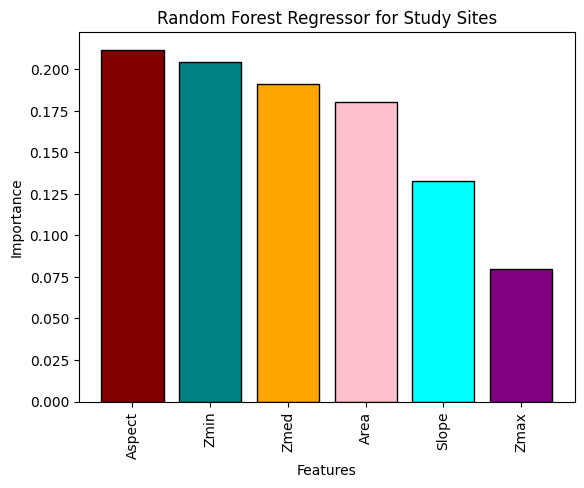

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR' #If you're using the training_data file, add an 's' after snowline in this line.

X = df[training_columns]
y = df[labels]

clf = RandomForestRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'],edgecolor = 'black')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor for Study Sites')

plt.show()

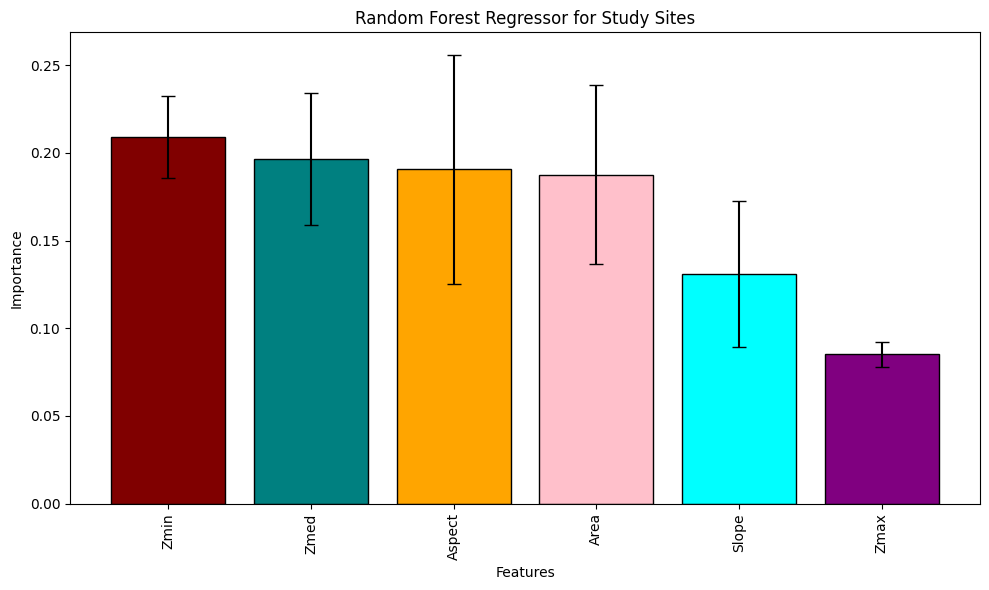

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'  # If using the training_data file, add an 's' after snowline in this line.

X = df[training_columns]
y = df[labels]

clf = RandomForestRegressor()
clf.fit(X, y)

# Initialize lists to store feature importances across folds
feature_importance_per_fold = []

# Loop through folds, fit on train, and collect feature importances
for train_index, test_index in KFold(n_splits=5).split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)
    feature_importance_per_fold.append(clf.feature_importances_)

# Calculate mean and standard deviation of feature importances across folds
mean_importances = np.mean(feature_importance_per_fold, axis=0)
std_importances = np.std(feature_importance_per_fold, axis=0)

# Sorting indices by mean importance
sorted_indices = np.argsort(mean_importances)[::-1]
sorted_feature_names = np.array(training_columns)[sorted_indices]
sorted_means = mean_importances[sorted_indices]
sorted_std = std_importances[sorted_indices]

# Define colors matching the original plot
colors = ['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple']

# Plotting with error bars and original colors
plt.figure(figsize=(10, 6))
for i in range(len(sorted_means)):
    plt.bar(i, sorted_means[i], color=colors[i], edgecolor='black', yerr=sorted_std[i], capsize=5)

plt.xticks(range(len(sorted_means)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor for Study Sites')
plt.tight_layout()
plt.show()


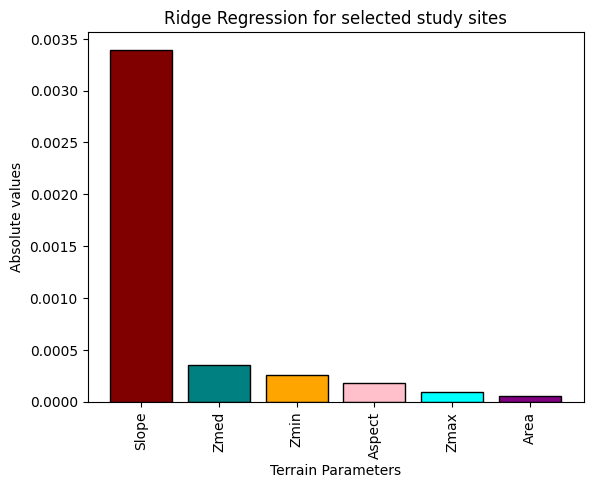

In [13]:
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt


labels = 'AAR'

X = df[training_columns]
y = df[labels]

clf = Ridge()
clf.fit(X, y)

coefficients = np.abs(clf.coef_)

sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = np.array(training_columns)[sorted_indices]

plt.bar(range(len(sorted_coefficients)), sorted_coefficients, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'], edgecolor = 'black')
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation='vertical')

plt.xlabel('Terrain Parameters')
plt.ylabel('Absolute values')
plt.title('Ridge Regression for selected study sites')

plt.show()

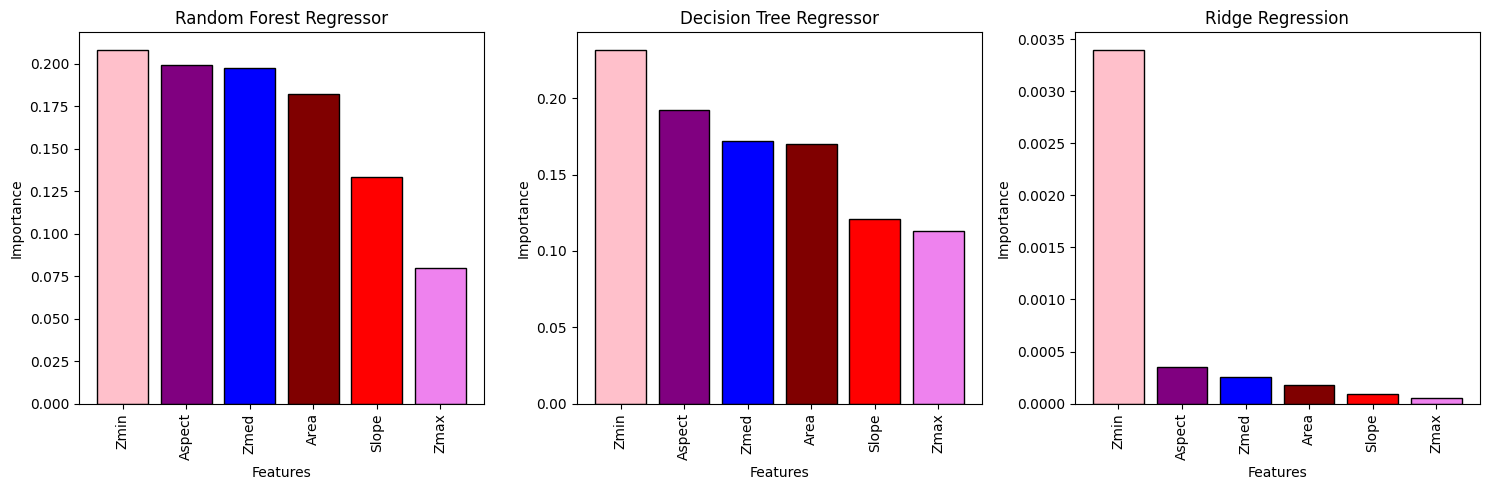

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge


training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'
X = df[training_columns]
y = df[labels]

random_forest = RandomForestRegressor()
decision_tree = DecisionTreeRegressor()
ridge_regression = Ridge()

random_forest.fit(X, y)
decision_tree.fit(X, y)
ridge_regression.fit(X, y)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = {
    'Area': 'maroon',
    'Zmin': 'pink',
    'Zmax': 'violet',
    'Zmed': 'blue',
    'Slope': 'red',
    'Aspect': 'purple'
}

rf_feature_importances = random_forest.feature_importances_
dt_feature_importances = decision_tree.feature_importances_
ridge_feature_importances = np.abs(ridge_regression.coef_)

sorted_rf_indices = np.argsort(rf_feature_importances)[::-1]
sorted_dt_indices = np.argsort(dt_feature_importances)[::-1]
sorted_ridge_indices = np.argsort(ridge_feature_importances)[::-1]

sorted_rf_feature_importances = rf_feature_importances[sorted_rf_indices]
sorted_dt_feature_importances = dt_feature_importances[sorted_dt_indices]
sorted_ridge_feature_importances = ridge_feature_importances[sorted_ridge_indices]

sorted_training_columns = np.array(training_columns)[sorted_rf_indices]

axs[0].bar(range(len(sorted_rf_feature_importances)), sorted_rf_feature_importances, color=[colors[column] for column in sorted_training_columns], edgecolor = 'black')
axs[0].set_xticks(range(len(sorted_rf_feature_importances)))
axs[0].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Importance')
axs[0].set_title('Random Forest Regressor')

axs[1].bar(range(len(sorted_dt_feature_importances)), sorted_dt_feature_importances, color=[colors[column] for column in sorted_training_columns], edgecolor = 'black')
axs[1].set_xticks(range(len(sorted_dt_feature_importances)))
axs[1].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Importance')
axs[1].set_title('Decision Tree Regressor')

axs[2].bar(range(len(sorted_ridge_feature_importances)), sorted_ridge_feature_importances, color=[colors[column] for column in sorted_training_columns],edgecolor = 'black')
axs[2].set_xticks(range(len(sorted_ridge_feature_importances)))
axs[2].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Importance')
axs[2].set_title('Ridge Regression')

plt.tight_layout()
plt.show()

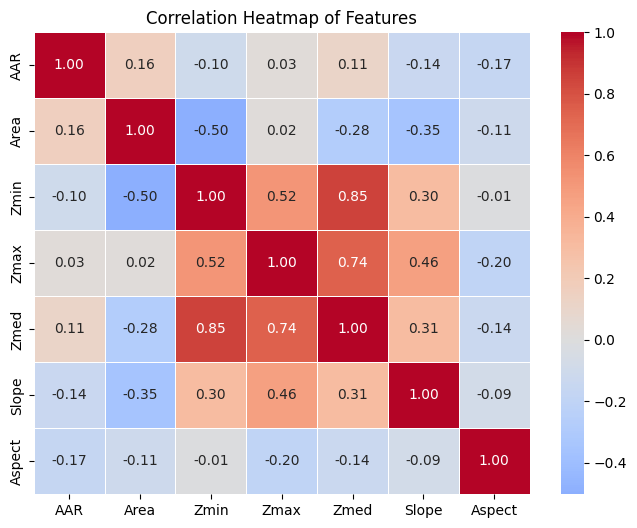

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

training_columns = ['AAR','Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'

# Assuming df, training_columns, and labels are defined as in your previous code snippet

# Select features and labels
X = df[training_columns]
y = df[labels]

# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,  annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()


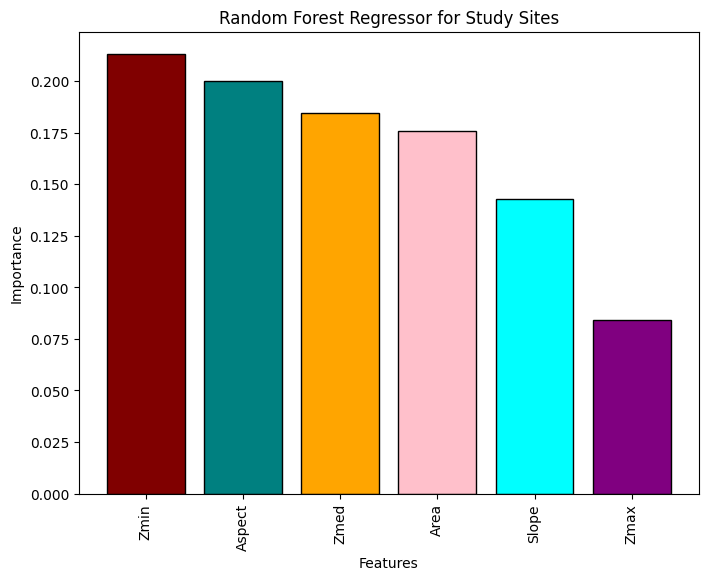

Mean Importance: 0.1667
Median Importance: 0.1802
Standard Deviation of Importance: 0.0430


In [32]:

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'  # If using the training_data file, add an 's' after snowline

X = df[training_columns]
y = df[labels]

clf = RandomForestRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'], edgecolor='black')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor for Study Sites')
plt.show()

# Calculating basic statistics using NumPy functions
mean_importance = np.mean(feature_importances)
median_importance = np.median(feature_importances)
std_dev_importance = np.std(feature_importances)

print(f"Mean Importance: {mean_importance:.4f}")
print(f"Median Importance: {median_importance:.4f}")
print(f"Standard Deviation of Importance: {std_dev_importance:.4f}")





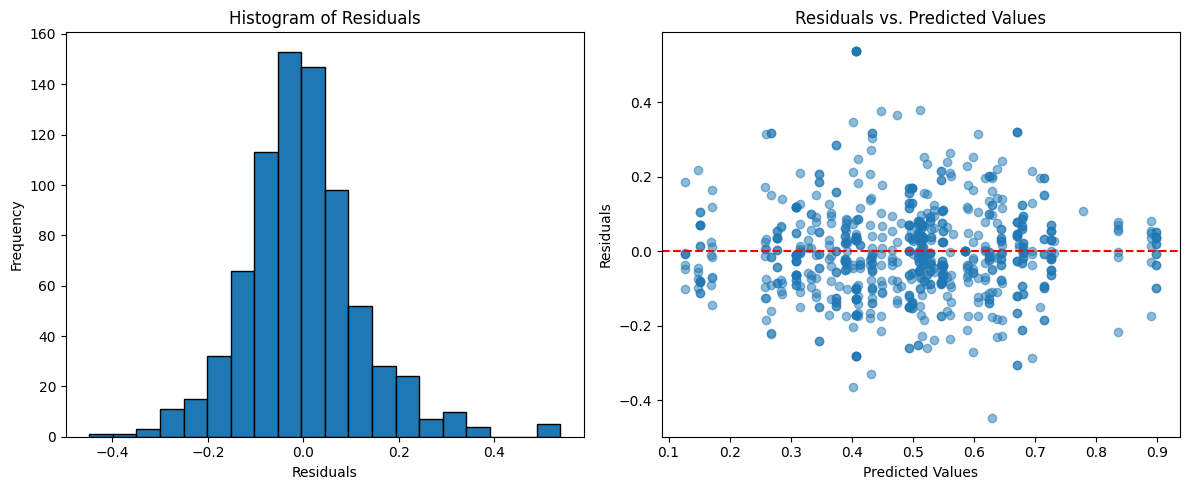

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'  # If using the training_data file, add an 's' after snowline

X = df[training_columns]
y = df[labels]

# Fit the Random Forest Regressor
clf = RandomForestRegressor()
clf.fit(X, y)

# Predictions using the model
predictions = clf.predict(X)

# Calculate residuals
residuals = y - predictions

# Plotting residuals (histogram and scatterplot)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=20, edgecolor='black')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Residuals')

# Scatterplot of predicted vs. actual values
axes[1].scatter(predictions, residuals, alpha=0.5)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs. Predicted Values')
plt.tight_layout()
plt.show()


In [34]:


training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'  # If using the training_data file, add an 's' after snowline

X = df[training_columns]
y = df[labels]

# Initialize the Random Forest Regressor
clf = RandomForestRegressor()

# Perform cross-validation for MSE
mse_scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')  # Using 5-fold cross-validation

# Convert negative MSE scores to positive and calculate mean MSE
mean_mse = -mse_scores.mean()

print(f"Mean Squared Error (MSE) using 5-fold cross-validation: {mean_mse:.4f}")


Mean Squared Error (MSE) using 5-fold cross-validation: 0.0414


In [37]:


# Calculate additional statistics
mean_importance = np.mean(feature_importances)
median_importance = np.median(feature_importances)
std_importance = np.std(feature_importances)
total_importance = np.sum(feature_importances)

# Display additional statistics as text
print(f"Mean Importance: {mean_importance:.4f}")
print(f"Median Importance: {median_importance:.4f}")
print(f"Standard Deviation: {std_importance:.4f}")
print(f"Total Importance: {total_importance:.4f}")



Mean Importance: 0.1667
Median Importance: 0.1802
Standard Deviation: 0.0430
Total Importance: 1.0000
